In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

# get the bathymetry file
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [3]:
isize = 898
jsize = 398

In [4]:
# e3t = mesh.e3t_0[0]

# # mask array of grid box thickness based on where there is land (tmask):
# e3t_mask = np.ma.masked_where((tmask[:,:,:] < 0.1), e3t[:,:,:])

# # find index of grid cell just above the ocean floor by finding the edges for the array along the z-axis:
# ind = np.array(np.ma.notmasked_edges(e3t_mask[:,:,:], axis=0)) # e3t shape: (z,x,y)

# # create array of shape (isize, jsize) containing bottom grid cell indices:
# index_bottom = ind[1][0][:].reshape(isize,jsize)
# ind.shape

In [6]:
# plt.pcolormesh(index_bottom)

In [34]:
a = np.arange(12).reshape((3, 4))
m = np.zeros_like(a)
m[1:2, 1:] = 1
m

array([[0, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 0, 0, 0]])

In [59]:
am = np.ma.array(a, mask=m)
test_y = np.ma.notmasked_edges(am, axis=0)
test_x = np.ma.notmasked_edges(am, axis=1)
am

masked_array(
  data=[[0, 1, 2, 3],
        [4, --, --, --],
        [8, 9, 10, 11]],
  mask=[[False, False, False, False],
        [False,  True,  True,  True],
        [False, False, False, False]],
  fill_value=999999)

In [60]:
for j in np.arange(len(test_y)):
    print('j = {}'.format(j))
    for i in np.arange(len(test_y[j][0])):
        print('Coastline Coords Y: ({}, {})'.format(test_y[j][0][i], test_y[j][1][i]))

for j in np.arange(len(test_x)):
    print('j = {}'.format(j))
    for i in np.arange(len(test_x[j][0])):
        print('Coastline Coords X: ({}, {})'.format(test_x[j][0][i], test_x[j][1][i]))

j = 0
Coastline Coords Y: (0, 0)
Coastline Coords Y: (0, 1)
Coastline Coords Y: (0, 2)
Coastline Coords Y: (0, 3)
j = 1
Coastline Coords Y: (2, 0)
Coastline Coords Y: (2, 1)
Coastline Coords Y: (2, 2)
Coastline Coords Y: (2, 3)
j = 0
Coastline Coords X: (0, 0)
Coastline Coords X: (1, 0)
Coastline Coords X: (2, 0)
j = 1
Coastline Coords X: (0, 3)
Coastline Coords X: (1, 0)
Coastline Coords X: (2, 3)


In [82]:
np.array(test_y).transpose(1, 2, 0).reshape(2, -1)
np.array(test_x).transpose(1, 2, 0).reshape(2, -1)

array([[0, 0, 1, 1, 2, 2],
       [0, 3, 0, 0, 0, 3]])

(0.0, 898.0)

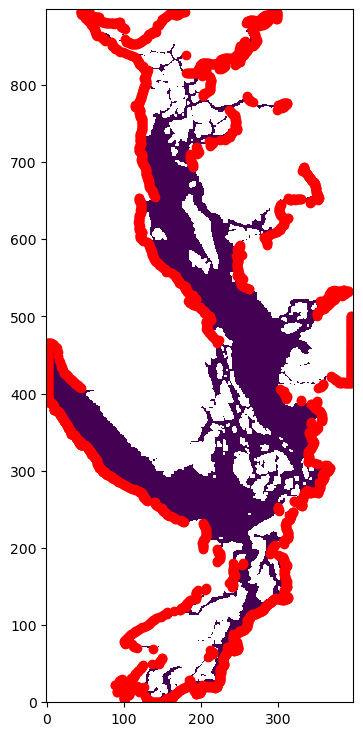

In [87]:
# mask array of grid box thickness based on where there is land (tmask):
# e3t_mask = np.ma.masked_where((tmask[:,:,:] < 0.1), e3t[:,:,:])
mesh_masked = np.ma.masked_array(tmask[0, :, :], mask=tmask[0, :, :])

coastline_y = np.array(np.ma.notmasked_edges(mesh_masked, axis=0))
coastline_x = np.array(np.ma.notmasked_edges(mesh_masked, axis=1))

coast_y = np.array(coastline_y).transpose(1, 2, 0).reshape(2, -1)
coast_x = np.array(coastline_x).transpose(1, 2, 0).reshape(2, -1)


fig, ax = plt.subplots(1, 1, figsize=(5, 9))
ax.imshow(mesh_masked)

ax.plot(coast_y[1], coast_y[0], 'ro')
ax.plot(coast_x[1], coast_x[0], 'ro')

ax.set_ylim([0,898])

In [57]:
test_x = coastline_x
test_y = coastline_y

for j in np.arange(len(test_y)):
    print('j = {}'.format(j))
    # for i in np.arange(len(test_y[j][0])):
        # print('Coastline Coords Y: ({}, {})'.format(test_y[j][0][i], test_y[j][1][i]))

for j in np.arange(len(test_x)):
    print('j = {}'.format(j))
    # for i in np.arange(len(test_x[j][0])):
        # print('Coastline Coords X: ({}, {})'.format(test_x[j][0][i], test_x[j][1][i]))

j = 0
j = 1
j = 0
j = 1


In [28]:
coastline_x[0][:]

array([389, 389, 389, 389, 389, 388, 387, 385, 379, 379, 379, 379, 378,
       378, 376, 376, 372, 371, 371, 369, 367, 365, 364, 363, 360, 359,
       357, 355, 354, 352, 350, 347, 347, 346, 346, 346, 345, 342, 341,
       340, 339, 336, 335, 334, 333, 333, 333, 333, 333, 333, 332, 331,
       329, 328, 327, 325, 324, 322, 321, 320, 318, 316, 316, 315, 309,
       308, 307, 304, 303, 302, 301, 300, 299, 299, 298, 297, 296, 295,
       295, 294, 294, 293, 293, 292, 291, 290, 289, 289,  23,  23,  13,
        14,  14,  14,  14,  14,  15,  14,  15,   4,   4,   6,   8,   9,
         9,  10,  11,  13,  14,  20,  20,  20,  19,  20,  20,  20,  21,
        20,  14,  13,  14,  15,  17,  18,  19,  20,   8,   6,   5,   2,
         3,   3,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   4,   5,
         5,   5,   5,   5,   5,   6,   7,   9,   9,  11,  11,  12,  12,
        13,  14,  16,  16,  16,  17,  18,  18,  19,  19,  20,  2

Coastline X: (2, 2, 394)
Coastline Y: (2, 2, 896)


(0.0, 898.0)

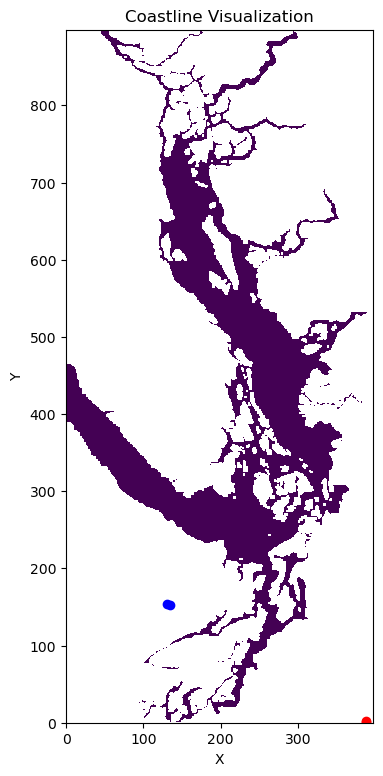

In [33]:
# Assuming you have a binary map where 1s represent water and 0s represent land
map_data = mesh_masked  # Load your map data with islands here (shape: (898, 398))

# # Create a masked array where land areas are masked
# masked_map = np.ma.masked_where(map_data == 0, map_data)

# Find the coastline using notmasked_edges along both axes
# coastline_x = np.ma.notmasked_edges(masked_map, axis=0)
# coastline_y = np.ma.notmasked_edges(masked_map, axis=1)
coastline_x = np.ma.notmasked_edges(mesh_masked, axis=0)
coastline_y = np.ma.notmasked_edges(mesh_masked, axis=1)

print("Coastline X:", np.array(coastline_x).shape)
print("Coastline Y:", np.array(coastline_y).shape)

fig, ax = plt.subplots(1, 1, figsize=(5, 9))
# Plot the map
# plt.imshow(masked_map)
ax.imshow(mesh_masked)

# # Plot the coastline
# for i in range(len(coastline_x[0])):
#     ax.plot(coastline_x[1][i], coastline_x[0][i], marker='o', color='red')

# Plot the coastline
for i in range(len(coastline_x[0])):
    ax.plot(coastline_x[0][0][i], coastline_x[0][1][i], marker='o', color='red')

for i in range(len(coastline_y[0])):
    ax.plot(coastline_y[0][1][i], coastline_y[1][1][i], marker='o', color='blue')

ax.set_title('Coastline Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_ylim([0,898])

Coastline X: [(array([1, 1, 2]), array([1, 2, 3])), (array([2, 3, 2]), array([1, 2, 3]))]
Coastline Y: [(array([1, 2, 3]), array([1, 1, 2])), (array([1, 2, 3]), array([2, 3, 2]))]


(4.0, 0.0)

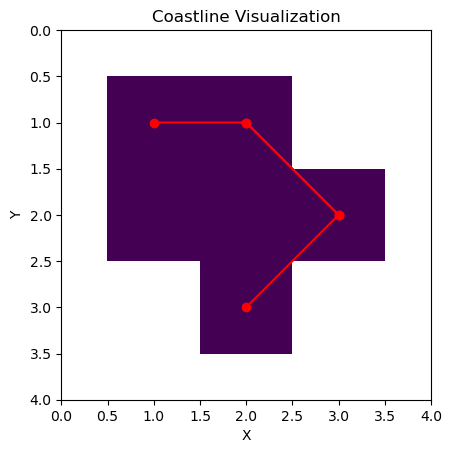

In [ ]:
# Create a sample masked array representing a map
# Let's assume 0s represent land and 1s represent water
map_data = np.array([[0, 0, 0, 0, 0],
                     [0, 1, 1, 0, 0],
                     [0, 1, 1, 1, 0],
                     [0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0]])

# Create a masked array where land areas are masked
masked_map = np.ma.masked_where(map_data == 0, map_data)

# Find the coastline using notmasked_edges along both axes
coastline_x = np.ma.notmasked_edges(masked_map, axis=0)
coastline_y = np.ma.notmasked_edges(masked_map, axis=1)

print("Coastline X:", coastline_x)
print("Coastline Y:", coastline_y)

# Plot the map
plt.imshow(masked_map)

# Plot the coastline
for i in range(len(coastline_x[0])):
    plt.plot(coastline_x[1][i], coastline_y[0][i], marker='o', color='red')

plt.title('Coastline Visualization')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim([0, 4])
plt.ylim([4, 0])

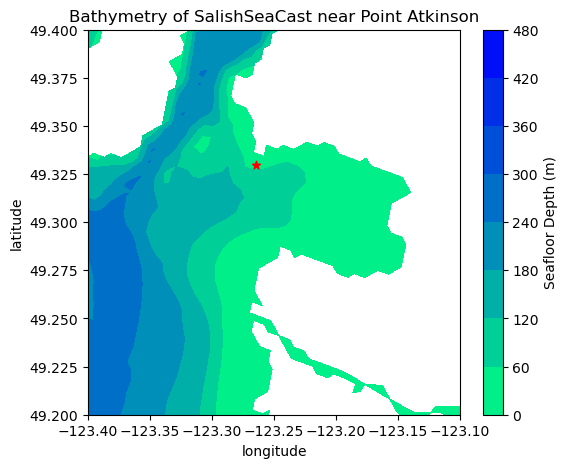

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
colours = ax.contourf(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap='winter_r')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Bathymetry of SalishSeaCast near Point Atkinson')

ax.set_xlim([-123.4, -123.1])
ax.set_ylim([49.2, 49.4])

ax.scatter(-123.264903, 49.329514, color='red', marker='*')

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Seafloor Depth (m)');